<a href="https://colab.research.google.com/github/inkatown/GRFP_Public_Data/blob/main/Public_GRFP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import glob
import os

def process_awardee_files(file_pattern):
    """
    Process all XLS files matching the given pattern and combine them into a single DataFrame.
    The year is extracted from the filename (AwardeeList_YYYY.xls) and added as a column.

    Args:
        file_pattern (str): File pattern to match (e.g., 'AwardeeList_*.xls')

    Returns:
        pd.DataFrame: Combined DataFrame with all data and a 'Year' column
    """
    all_data = []

    for file_path in glob.glob(file_pattern):
        # Extract year from filename
        file_name = os.path.basename(file_path)
        year = file_name.split('_')[1].split('.')[0]

        try:
            # Read the Excel file
            df = pd.read_csv(file_path, sep='\t')

            # Add year column
            df['Year'] = year

            # Standardize column names (in case they vary between files)
            df.columns = df.columns.str.strip()  # Remove any whitespace
            df = df.rename(columns={
                'Names': 'Name',
                'Baccalaureate Institution': 'BaccalaureateInstitution',
                'Field of Study': 'FieldOfStudy',
                'Current Institution': 'CurrentInstitution'
            })

            all_data.append(df)

        except Exception as e:
            print(f"Error processing file {file_name}: {str(e)}")

    if not all_data:
        print("No files found or processed.")
        return pd.DataFrame()

    # Combine all DataFrames
    combined_df = pd.concat(all_data, ignore_index=True)

    # Reorder columns to have Year first
    cols = ['Year'] + [col for col in combined_df.columns if col != 'Year']
    combined_df = combined_df[cols]

    return combined_df

# Example usage:
if __name__ == "__main__":
    # Process all AwardeeList files in the current directory
    df = process_awardee_files('AwardeeList_*.tsv')

    if not df.empty:
        print("Successfully processed files. Sample data:")
        print(df.head())

        # Optionally save to CSV
        df.to_csv('combined_awardees.csv', index=False)
        print("Saved combined data to 'combined_awardees.csv'")
    else:
        print("No data was processed.")

Successfully processed files. Sample data:
   Year                         Name  \
0  2022         Aarons, Zoe Samantha   
1  2022             Abadia, Gabriela   
2  2022           Abdallah, Kyrillos   
3  2022  Abdulla, Muhammad Ugur oglu   
4  2022                   Abed, Omar   

                            BaccalaureateInstitution  \
0                                    Bowdoin College   
1                              University of Florida   
2  Regents of the University of Michigan - Ann Arbor   
3                              University of Florida   
4                           Arizona State University   

                            FieldOfStudy  \
0  Geosciences - Biological Oceanography   
1   Engineering - Mechanical Engineering   
2     Life Sciences - Structural Biology   
3   Engineering - Biomedical Engineering   
4     Engineering - Chemical Engineering   

                      CurrentInstitution  
0  Massachusetts Institute of Technology  
1                  Universit

In [12]:
df

,Year,Name,BaccalaureateInstitution,FieldOfStudy,CurrentInstitution
0,2022,"Aarons, Zoe Samantha",Bowdoin College,Geosciences - Biological Oceanography,Massachusetts Institute of Technology
1,2022,"Abadia, Gabriela",University of Florida,Engineering - Mechanical Engineering,University of Florida
2,2022,"Abdallah, Kyrillos",Regents of the University of Michigan - Ann Arbor,Life Sciences - Structural Biology,Yale University
3,2022,"Abdulla, Muhammad Ugur oglu",University of Florida,Engineering - Biomedical Engineering,University of Florida
4,2022,"Abed, Omar",Arizona State University,Engineering - Chemical Engineering,University of Michigan
...,...,...,...,...,...
7779,2025,"Zimmerman, Conrad",Brown University,"Comp/IS/Eng - Formal Methods, Verification, an...",Northeastern University
7780,2025,"Zoppelt, Seth",College of Charleston,Engineering - Aeronautical and Aerospace Engin...,Iowa State University
7781,2025,"Zou, Harry Xia-Yang",UNIVERSITY OF MARYLAND,Engineering - Biomedical Engineering,CORNELL UNIVERSITY
7782,2025,"Zouridakis, Antonia",OHIO STATE UNIVERSITY,Psychology - Neuropsychology,Northwestern University


In [3]:
df.groupby('BaccalaureateInstitution', as_index=False).size()

,BaccalaureateInstitution,size
0,"AMERICAN PUBLIC UNIVERSITY SYSTEM, INC.",1
1,ARIZONA STATE UNIVERSITY,31
2,Abilene Christian University,1
3,Abraham Baldwin Agricultural College,1
4,Adelphi University,2
...,...,...
832,Yale-NUS College,1
833,Yeshiva University,1
834,York College of Pennsylvania,1
835,Zewail City of Science and Technology,1


In [8]:
df

,Name,Baccalaureate Institution,Field of Study,Current Institution
0,"AGLYAMOVA, GALINA V",Lomonosov Moscow State University,Life Sciences - Other (specify) - Ecology and ...,NaN
1,"Aalto, Jonathan P",UNIVERSITY OF WASHINGTON,Chemistry - Chemical Synthesis,UNIVERSITY OF WASHINGTON
2,"Abubakr, Yousuf","UNIVERSITY OF CALIFORNIA, BERKELEY",Engineering - Mechanical Engineering,"UNIVERSITY OF CALIFORNIA, BERKELEY"
3,"Abuissa, Maryam",Amherst College,Comp/IS/Eng - Computer Security and Privacy,Amherst College
4,"Ackerman, Alyson",UNIVERSITY OF KENTUCKY,Chemistry - Chemical Synthesis,UNIVERSITY OF KENTUCKY
...,...,...,...,...
2031,"ayoub, rayyan",University of California-Riverside,Engineering - Bioengineering,University of California-Riverside
2032,"brenner, jonah",Skidmore College,Psychology - Developmental Psychology,Skidmore College
2033,"de Almenara, Adrian Jordi",UNIVERSITY OF CALIFORNIA SAN DIEGO,Chemistry - Chemical Synthesis,California Institute of Technology
2034,"van Zyl, Jacqueline F",Georgia Institute of Technology,Engineering - Mechanical Engineering,Georgia Institute of Technology


In [ ]:
https://www.fourfront.us/wp-content/uploads/2023/10/US-Accredited-Institutions-Final.xlsx

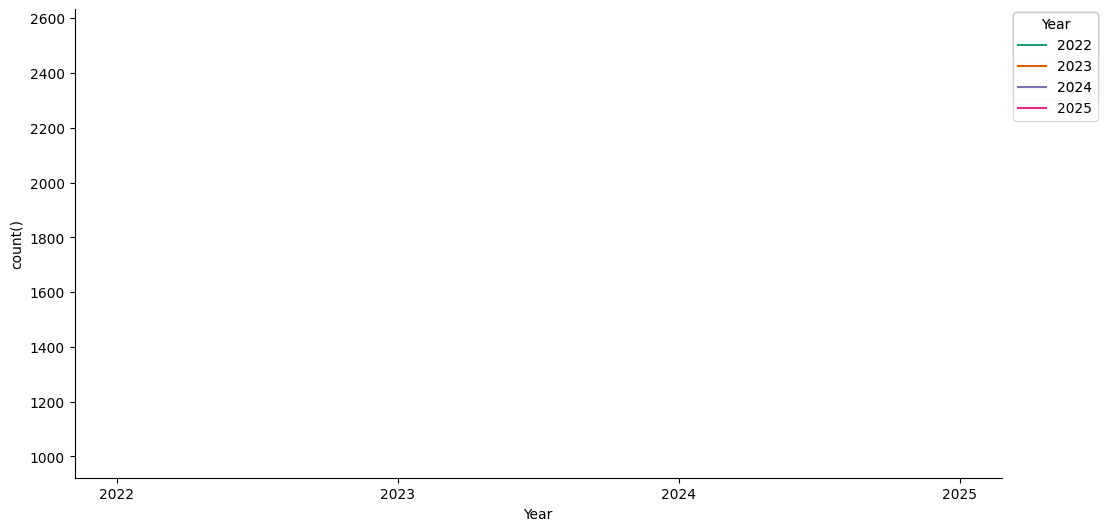

In [5]:
# @title Year vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Year'}, axis=1)
              .sort_values('Year', ascending=True))
  xs = counted['Year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Year')):
  _plot_series(series, series_name, i)
  fig.legend(title='Year', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('count()')

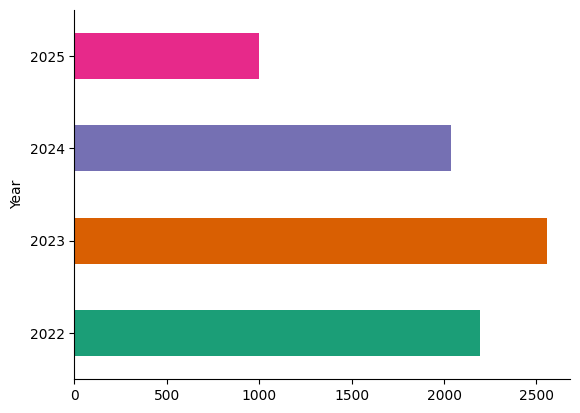

In [4]:
# @title Year

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Year').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [11]:
url = 'https://www.fourfront.us/wp-content/uploads/2023/10/US-Accredited-Institutions-Final.xlsx'
accredited_institutions_df = pd.read_excel(url, sheet_name='DATA', header=10)
accredited_institutions_df

,Unnamed: 0,ID,INSTITUTION ID,INSTITUTION NAME,ALIAS,ADDRESS,CITY,STATE (ABRV),ZIP,ZIP_fiveDigit,...,GRAD OFFERING,DEGREE-GRANTING STATUS,LOCALE,PUBLIC STATUS,POST SECONDARY STATUS,FIPS COUNTY CODE,COUNTY,CONGRESSIONAL DISTRICT,LONGITUDE,LATITUDE
0,NaN,1,100654,Alabama A & M University,AAMU,4900 Meridian Street,Normal,AL,35762,35762,...,Offers Graduate,Degree-granting,City: Midsize (100-250K),Open to public,Post-secondary,1089.0,Madison County,105.0,-86.568502,34.783368
1,NaN,2,100663,University of Alabama at Birmingham,UAB,Administration Bldg Suite 1070,Birmingham,AL,35294-0110,35294,...,Offers Graduate,Degree-granting,City: Midsize (100-250K),Open to public,Post-secondary,1073.0,Jefferson County,107.0,-86.799345,33.505697
2,NaN,3,100690,Amridge University,Southern Christian University Regions University,1200 Taylor Rd,Montgomery,AL,36117-3553,36117,...,Offers Graduate,Degree-granting,City: Midsize (100-250K),Open to public,Post-secondary,1101.0,Montgomery County,102.0,-86.174010,32.362609
3,NaN,4,100706,University of Alabama in Huntsville,UAH University of Alabama Huntsville,301 Sparkman Dr,Huntsville,AL,35899,35899,...,Offers Graduate,Degree-granting,City: Midsize (100-250K),Open to public,Post-secondary,1089.0,Madison County,105.0,-86.640449,34.724557
4,NaN,5,100724,Alabama State University,,915 S Jackson Street,Montgomery,AL,36104-0271,36104,...,Offers Graduate,Degree-granting,City: Midsize (100-250K),Open to public,Post-secondary,1101.0,Montgomery County,107.0,-86.295677,32.364317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6284,NaN,6285,497301,Avalon Institute-Las Vegas,,"2650 South Decatur Boulevard Suites 1, 6, 8-10",Las Vegas,NV,89102-0046,89102,...,No Graduate Offerings,Nondegree-granting,Suburb: Large (250K+),Open to public,Post-secondary,32003.0,Clark County,3201.0,-115.206409,36.142355
6285,NaN,6286,497310,Medspa Academies-National Institute of Modern ...,,3993 Howard Hughes Parkway Suite 150,Las Vegas,NV,89169-6745,89169,...,No Graduate Offerings,Nondegree-granting,City: Midsize (100-250K),Open to public,Post-secondary,32003.0,Clark County,3201.0,-115.158173,36.117236
6286,NaN,6287,497329,American Institute-Cherry Hill,,2201 Route 38 8th Floor,Cherry Hill,NJ,08002-4309,8002,...,No Graduate Offerings,Nondegree-granting,Suburb: Large (250K+),Open to public,Post-secondary,34007.0,Camden County,3401.0,-75.015417,39.939428
6287,NaN,6288,497338,Glendale Career College-North-West College-Bak...,,3000 Ming Avenue,Bakersfield,CA,93304-5075,93304,...,No Graduate Offerings,Degree-granting,City: Large (250K+),Open to public,Post-secondary,6029.0,Kern County,623.0,-119.035082,35.339951


In [12]:

accredited_institutions_df.groupby('Institution', as_index=False).size()

KeyError: 'Institution'

# Task
Aggregate df by using the BaccalaureateInstitution column wihth the accredited_institutions_df using th institution name colmn

## Inspect dataframes

### Subtask:
Examine the column names and a few rows of both `df` and `accredited_institutions_df` to understand their structure and identify the columns to be used for merging.


**Reasoning**:
Display the head and column names of both dataframes to understand their structure and identify the columns for merging.



In [14]:
print("df head:")
display(df.head())
print("\ndf columns:")
print(df.columns)

print("\naccredited_institutions_df head:")
display(accredited_institutions_df.head())
print("\naccredited_institutions_df columns:")
print(accredited_institutions_df.columns)

df head:


,Year,Name,BaccalaureateInstitution,FieldOfStudy,CurrentInstitution
0,2022,"Aarons, Zoe Samantha",Bowdoin College,Geosciences - Biological Oceanography,Massachusetts Institute of Technology
1,2022,"Abadia, Gabriela",University of Florida,Engineering - Mechanical Engineering,University of Florida
2,2022,"Abdallah, Kyrillos",Regents of the University of Michigan - Ann Arbor,Life Sciences - Structural Biology,Yale University
3,2022,"Abdulla, Muhammad Ugur oglu",University of Florida,Engineering - Biomedical Engineering,University of Florida
4,2022,"Abed, Omar",Arizona State University,Engineering - Chemical Engineering,University of Michigan



df columns:
Index(['Year', 'Name', 'BaccalaureateInstitution', 'FieldOfStudy',
       'CurrentInstitution'],
      dtype='object')

accredited_institutions_df head:


,Unnamed: 0,ID,INSTITUTION ID,INSTITUTION NAME,ALIAS,ADDRESS,CITY,STATE (ABRV),ZIP,ZIP_fiveDigit,...,GRAD OFFERING,DEGREE-GRANTING STATUS,LOCALE,PUBLIC STATUS,POST SECONDARY STATUS,FIPS COUNTY CODE,COUNTY,CONGRESSIONAL DISTRICT,LONGITUDE,LATITUDE
0,NaN,1,100654,Alabama A & M University,AAMU,4900 Meridian Street,Normal,AL,35762,35762,...,Offers Graduate,Degree-granting,City: Midsize (100-250K),Open to public,Post-secondary,1089.0,Madison County,105.0,-86.568502,34.783368
1,NaN,2,100663,University of Alabama at Birmingham,UAB,Administration Bldg Suite 1070,Birmingham,AL,35294-0110,35294,...,Offers Graduate,Degree-granting,City: Midsize (100-250K),Open to public,Post-secondary,1073.0,Jefferson County,107.0,-86.799345,33.505697
2,NaN,3,100690,Amridge University,Southern Christian University Regions University,1200 Taylor Rd,Montgomery,AL,36117-3553,36117,...,Offers Graduate,Degree-granting,City: Midsize (100-250K),Open to public,Post-secondary,1101.0,Montgomery County,102.0,-86.174010,32.362609
3,NaN,4,100706,University of Alabama in Huntsville,UAH University of Alabama Huntsville,301 Sparkman Dr,Huntsville,AL,35899,35899,...,Offers Graduate,Degree-granting,City: Midsize (100-250K),Open to public,Post-secondary,1089.0,Madison County,105.0,-86.640449,34.724557
4,NaN,5,100724,Alabama State University,,915 S Jackson Street,Montgomery,AL,36104-0271,36104,...,Offers Graduate,Degree-granting,City: Midsize (100-250K),Open to public,Post-secondary,1101.0,Montgomery County,107.0,-86.295677,32.364317



accredited_institutions_df columns:
Index(['Unnamed: 0', 'ID', 'INSTITUTION ID', 'INSTITUTION NAME', 'ALIAS',
       'ADDRESS', 'CITY', 'STATE (ABRV)', 'ZIP', 'ZIP_fiveDigit',
       'FIPS STATE COD', 'TELEPHONE', 'EIN #', 'OPE ID #', 'WEBSITE',
       'INSTITUTION LEVEL', 'CONTROL', 'HIGHEST OFFERING', 'UG OFFERING',
       'GRAD OFFERING', 'DEGREE-GRANTING STATUS', 'LOCALE', 'PUBLIC STATUS',
       'POST SECONDARY STATUS', 'FIPS COUNTY CODE', 'COUNTY',
       'CONGRESSIONAL DISTRICT', 'LONGITUDE', 'LATITUDE'],
      dtype='object')


## Standardize institution names

### Subtask:
Clean and standardize the institution names in both dataframes to ensure a successful merge. This might involve removing extra spaces, handling case sensitivity, and addressing variations in names (e.g., abbreviations).


**Reasoning**:
Standardize the institution names in both dataframes by converting to lowercase and removing whitespace to prepare for merging.



In [16]:
df['BaccalaureateInstitution'] = df['BaccalaureateInstitution'].str.lower().str.strip()
accredited_institutions_df['INSTITUTION NAME'] = accredited_institutions_df['INSTITUTION NAME'].str.lower().str.strip()
accredited_institutions_df['standardized_name'] = accredited_institutions_df['INSTITUTION NAME']

print("Standardized 'BaccalaureateInstitution' in df:")
display(df[['BaccalaureateInstitution']].head())
print("\nStandardized 'INSTITUTION NAME' and 'standardized_name' in accredited_institutions_df:")
display(accredited_institutions_df[['INSTITUTION NAME', 'standardized_name']].head())

Standardized 'BaccalaureateInstitution' in df:


,BaccalaureateInstitution
0,bowdoin college
1,university of florida
2,regents of the university of michigan - ann arbor
3,university of florida
4,arizona state university



Standardized 'INSTITUTION NAME' and 'standardized_name' in accredited_institutions_df:


,INSTITUTION NAME,standardized_name
0,alabama a & m university,alabama a & m university
1,university of alabama at birmingham,university of alabama at birmingham
2,amridge university,amridge university
3,university of alabama in huntsville,university of alabama in huntsville
4,alabama state university,alabama state university


## Merge dataframes

### Subtask:
Merge `df` with `accredited_institutions_df` based on the standardized institution names.


**Reasoning**:
Merge the two dataframes using the standardized institution names and display the head of the resulting dataframe.



In [17]:
merged_df = pd.merge(df, accredited_institutions_df, left_on='BaccalaureateInstitution', right_on='standardized_name', how='left')
display(merged_df.head())

,Year,Name,BaccalaureateInstitution,FieldOfStudy,CurrentInstitution,Unnamed: 0,ID,INSTITUTION ID,INSTITUTION NAME,ALIAS,...,DEGREE-GRANTING STATUS,LOCALE,PUBLIC STATUS,POST SECONDARY STATUS,FIPS COUNTY CODE,COUNTY,CONGRESSIONAL DISTRICT,LONGITUDE,LATITUDE,standardized_name
0,2022,"Aarons, Zoe Samantha",bowdoin college,Geosciences - Biological Oceanography,Massachusetts Institute of Technology,NaN,1354.0,161004.0,bowdoin college,,...,Degree-granting,Town: Fringe: (<10 mi),Open to public,Post-secondary,23005.0,Cumberland County,2301.0,-69.963942,43.907134,bowdoin college
1,2022,"Abadia, Gabriela",university of florida,Engineering - Mechanical Engineering,University of Florida,NaN,678.0,134130.0,university of florida,,...,Degree-granting,City: Midsize (100-250K),Open to public,Post-secondary,12001.0,Alachua County,1203.0,-82.347911,29.646290,university of florida
2,2022,"Abdallah, Kyrillos",regents of the university of michigan - ann arbor,Life Sciences - Structural Biology,Yale University,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022,"Abdulla, Muhammad Ugur oglu",university of florida,Engineering - Biomedical Engineering,University of Florida,NaN,678.0,134130.0,university of florida,,...,Degree-granting,City: Midsize (100-250K),Open to public,Post-secondary,12001.0,Alachua County,1203.0,-82.347911,29.646290,university of florida
4,2022,"Abed, Omar",arizona state university,Engineering - Chemical Engineering,University of Michigan,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Aggregate data

### Subtask:
After merging, aggregate the combined dataframe by 'BaccalaureateInstitution' (or the corresponding column from the merged dataframe) to get the desired counts or other aggregations.


**Reasoning**:
Aggregate the merged dataframe by 'BaccalaureateInstitution' and count the occurrences.



In [19]:
institution_counts = merged_df.groupby('BaccalaureateInstitution', as_index=False).size()
display(institution_counts.head())

,BaccalaureateInstitution,size
0,abilene christian university,1
1,abraham baldwin agricultural college,1
2,adelphi university,2
3,agnes scott college,3
4,alabama a&m university,1


## Analyze and display results

### Subtask:
Display the aggregated results and analyze them to understand the distribution of awardees across institutions and potentially cross-reference with accreditation information.


**Reasoning**:
Sort the institution_counts DataFrame by size in descending order and display the top 10.



In [20]:
institution_counts_sorted = institution_counts.sort_values('size', ascending=False)
display(institution_counts_sorted.head(10))

,BaccalaureateInstitution,size
563,"university of california, berkeley",266
302,massachusetts institute of technology,256
575,university of california-los angeles,150
205,georgia institute of technology,140
135,cornell university,125
703,university of texas at austin,122
131,columbia university,112
392,princeton university,111
401,regents of the university of michigan - ann arbor,110
59,california institute of technology,105


from matplotlib import pyplot as plt
_df_0['size'].plot(kind='hist', bins=20, title='size')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['size'].plot(kind='line', figsize=(8, 4), title='size')
plt.gca().spines[['top', 'right']].set_visible(False)

## Summary:

### Data Analysis Key Findings

*   The top 10 institutions with the most awardees have been identified after merging the main dataframe with accredited institutions and aggregating by institution.
*   The list of top institutions includes prominent universities such as the University of California, Berkeley, Massachusetts Institute of Technology, and University of California-Los Angeles.

### Insights or Next Steps

*   Further analysis could involve merging the aggregated counts with the `accredited_institutions_df` to see how many of the top institutions are accredited and to explore other institutional characteristics.
*   Investigate the distribution of awardees across different fields of study for the top institutions.


In [25]:
# prompt: show the distinct counts by 'STATE (ABRV)' from the merged_df

# Display distinct counts by 'STATE (ABRV)' from the merged_df
state_counts = merged_df['STATE (ABRV)'].value_counts().reset_index()
state_counts.columns = ['STATE (ABRV)', 'Count']
print("\nDistinct counts by 'STATE (ABRV)' from merged_df:")
display(state_counts)


Distinct counts by 'STATE (ABRV)' from merged_df:


,STATE (ABRV),Count
0,CA,864
1,MA,621
2,NY,370
3,FL,217
4,PA,213
5,NC,185
6,IL,177
7,NJ,138
8,CT,134
9,GA,124


from matplotlib import pyplot as plt
state_counts['Count'].plot(kind='hist', bins=20, title='Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
state_counts['Count'].plot(kind='line', figsize=(8, 4), title='Count')
plt.gca().spines[['top', 'right']].set_visible(False)

In [26]:
import plotly.express as px

fig = px.choropleth(state_counts,
                    locations='STATE (ABRV)',
                    locationmode='USA-states',
                    color='Count',
                    scope='usa',
                    hover_name='STATE (ABRV)',
                    color_continuous_scale="Viridis",
                    title='Number of Awardees by State')
fig.show()